In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_electricity = pd.read_csv('electricity_data_nl_2022_2025_hourly_flow.csv', index_col=0, parse_dates=True)
df_weather = pd.read_csv('../twan/Weather_data/Data/hist_weather_data_2022-2025Mar31_2025-04-14T07-12-39+00-00.csv', index_col=0, parse_dates=True)
df_weather_debilt = df_weather[df_weather['location'] == 'DeBilt']

In [22]:
df_electricity.index = pd.to_datetime(df_electricity.index)
df_weather_debilt.index = pd.to_datetime(df_weather_debilt.index)

merged_df_elec_weather = pd.merge(df_electricity, df_weather_debilt, left_index=True, right_index=True, how='inner')

In [ ]:
import pandas as pd

# Define the base file path and the list of file suffixes (31 = empty)
base_file_path = '../../src/data/ned-api/hr-data/power-gen-type-2022-2025-'
file_suffixes = [1, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 35, 50]
merged_df_total = merged_df_elec_weather.copy()

# Iterate over the file suffixes and merge the data
for suffix in file_suffixes:
    file_path = f'{base_file_path}{suffix}.csv'
    df = pd.read_csv(file_path, parse_dates=['validto'], index_col='validto')

# Rename the columns to avoid conflicts
    df = df.rename(columns={'capacity': f'capacity_{suffix}', 'volume': f'volume_{suffix}'})
    print(df.head())

# Merge the data on the index (time)
    merged_df_total = pd.merge(merged_df_total, df[[f'capacity_{suffix}', f'volume_{suffix}']], left_index=True, right_index=True, how='left')


# Rename the volume columns
merged_df_total = merged_df_total.rename(columns={
    'volume_1': 'production_wind', 
    'volume_2': 'production_solar', 
    'volume_3': 'production_biogas',
    'volume_4': 'production_heatpump', 
    'volume_8': 'production_cofiring', 
    'volume_9': 'production_geothermal', 
    'volume_10': 'production_other', 
    'volume_11': 'production_waste', 
    'volume_12': 'production_biooil', 
    'volume_13': 'production_biomass', 
    'volume_14': 'production_wood', 
    'volume_17': 'production_windoffshore', 
    'volume_18': 'production_fossilgaspower', 
    'volume_19': 'production_fossilhardcoal', 
    'volume_20': 'production_nuclear', 
    'volume_21': 'production_wastepower', 
    'volume_22': 'production_windoffshoreB', 
    'volume_24': 'production_biomethane',
    'volume_25': 'production_biomasspower', 
    'volume_26': 'production_otherpower', 
    'volume_27': 'production_electricitymix',
    'volume_28': 'production_gasmix', 
    'volume_35': 'production_CHP_total', 
    'volume_50': 'production_solarthermal'
})
df_filtered = merged_df_total.loc['2022-04-01':'2025-04-01']
df_filtered.head

# Remove columns that start with "capacity"
df_filtered = df_filtered.loc[:, ~df_filtered.columns.str.startswith('capacity')]

df_filtered.to_csv('df_filtered.csv')

print(df_filtered.columns)

                                                    @id        @type  \
validto                                                                
2022-01-01 00:00:00+00:00  /v1/utilizations/23789747297  Utilization   
2022-01-01 01:00:00+00:00  /v1/utilizations/23792908662  Utilization   
2022-01-01 02:00:00+00:00  /v1/utilizations/23796069285  Utilization   
2022-01-01 03:00:00+00:00  /v1/utilizations/23799229590  Utilization   
2022-01-01 04:00:00+00:00  /v1/utilizations/23802389927  Utilization   

                                    id         point         type  \
validto                                                             
2022-01-01 00:00:00+00:00  23789747297  /v1/points/0  /v1/types/1   
2022-01-01 01:00:00+00:00  23792908662  /v1/points/0  /v1/types/1   
2022-01-01 02:00:00+00:00  23796069285  /v1/points/0  /v1/types/1   
2022-01-01 03:00:00+00:00  23799229590  /v1/points/0  /v1/types/1   
2022-01-01 04:00:00+00:00  23802389927  /v1/points/0  /v1/types/1   

           

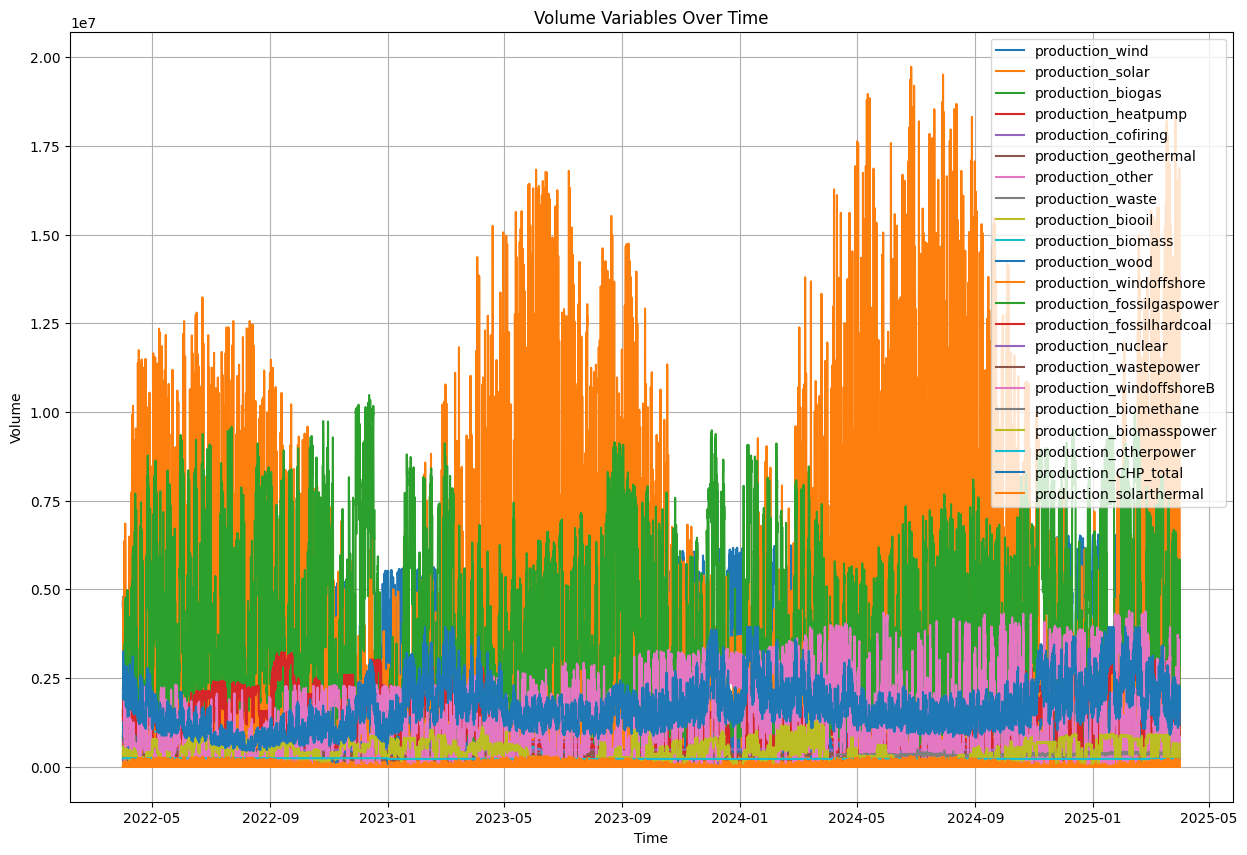

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Select columns that start with "volume"
volume_columns = [
    'production_wind', 
    'production_solar', 
    'production_biogas',
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomethane',
    'production_biomasspower', 
    'production_otherpower', 
    'production_CHP_total', 
    'production_solarthermal', 
]

# Filter the DataFrame to include only the volume columns
df_volume = df_filtered[volume_columns]

# Plot the volume columns
plt.figure(figsize=(15, 10))
for col in df_volume.columns:
    plt.plot(df_volume.index, df_volume[col], label=col)

plt.xlabel('Time')
plt.ylabel('Volume')
plt.title('Volume Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Resample de data naar dagelijkse frequentie en bereken de som
df_weekly = df_volume.resample('W').sum()

# Genereer een colormap met unieke kleuren
colors = cm.get_cmap('tab20', len(df_weekly.columns))

# Plot de wekelijkse gemiddelden met unieke kleuren
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_weekly.columns):
    plt.plot(df_weekly.index, df_weekly[col], label=col, color=colors(i))



# Plot de dagelijkse totalen
plt.figure(figsize=(15, 10))
for col in df_weekly_avg.columns:
    plt.plot(df_weekly_avg.index, df_weekly_avg[col], label=col)

plt.xlabel('Date')
plt.ylabel('Weekly total production')
plt.title('Weekly total production per energy source')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df_weekly_avg' is not defined

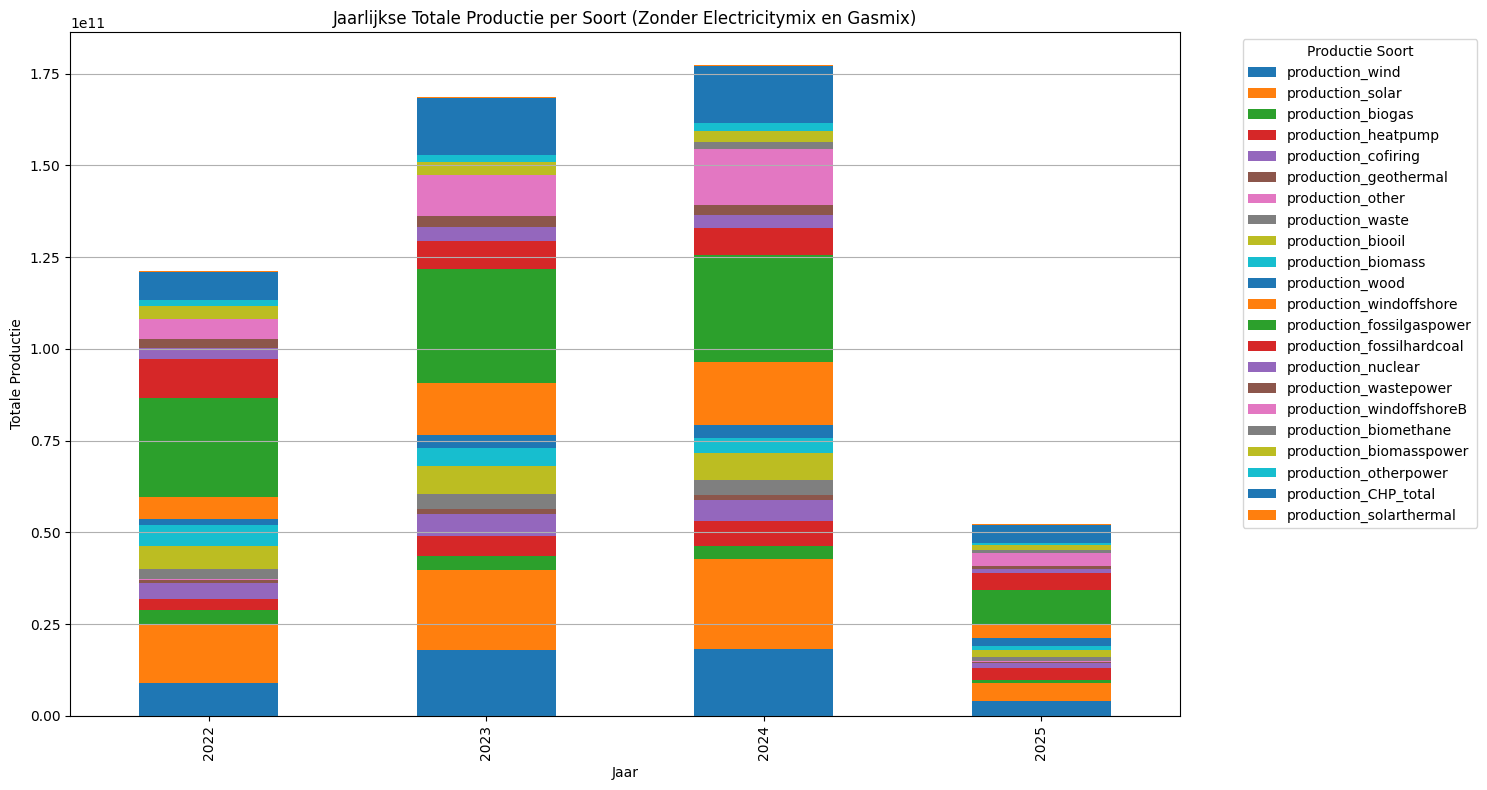

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecteer alleen de kolommen die beginnen met 'production', behalve de uitgesloten kolommen
excluded_columns = ['production_electricitymix', 'production_gasmix']
production_columns = [col for col in df_filtered.columns if col.startswith('production') and col not in excluded_columns]

# Voeg een kolom toe voor het jaar (afgeleid van de index)
df_filtered['Year'] = df_filtered.index.year

# Bereken de jaarlijkse som voor alle 'production'-kolommen
yearly_production = df_filtered.groupby('Year')[production_columns].sum()

# Plot de jaarlijkse totalen
yearly_production.plot(kind='bar', figsize=(15, 8), stacked=True)

plt.title('Jaarlijkse Totale Productie per Soort (Zonder Electricitymix en Gasmix)')
plt.xlabel('Jaar')
plt.ylabel('Totale Productie')
plt.legend(title='Productie Soort', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

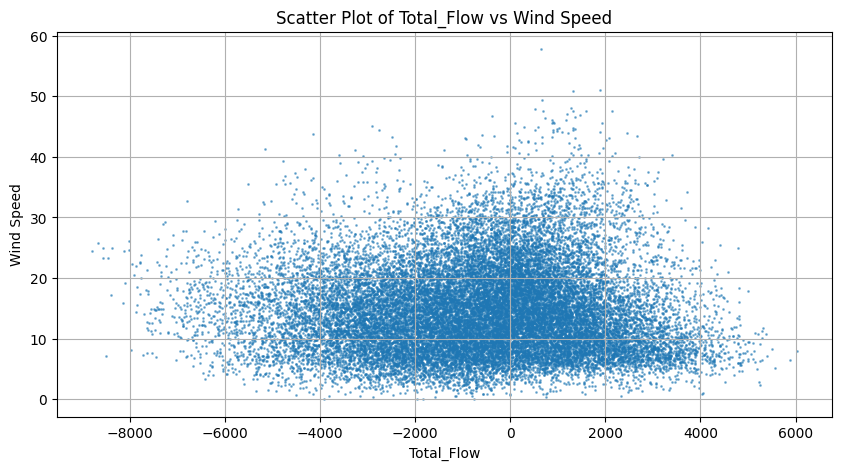

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Total_Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Total_Flow vs Wind Speed')
plt.grid(True)
plt.show()

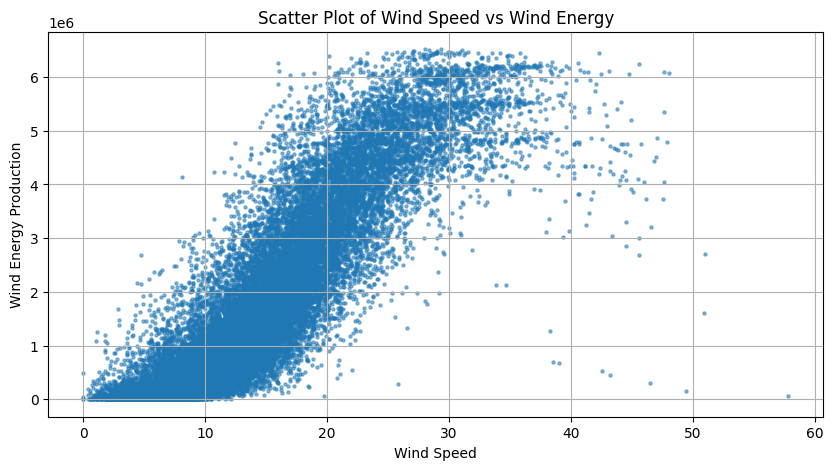

In [8]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['wind_speed_10m'], df_filtered['production_wind'], s=5, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Wind Speed')
plt.ylabel('Wind Energy Production')
plt.title('Scatter Plot of Wind Speed vs Wind Energy')
plt.grid(True)
plt.show()

In [9]:
import numpy as np

# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_ws = df_filtered[['production_wind', 'wind_speed_10m']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_ws['production_wind'], df_filtered_ws['wind_speed_10m'])
print("Correlation coefficient matrix:")
print(r)

Correlation coefficient matrix:
[[1.         0.87753639]
 [0.87753639 1.        ]]


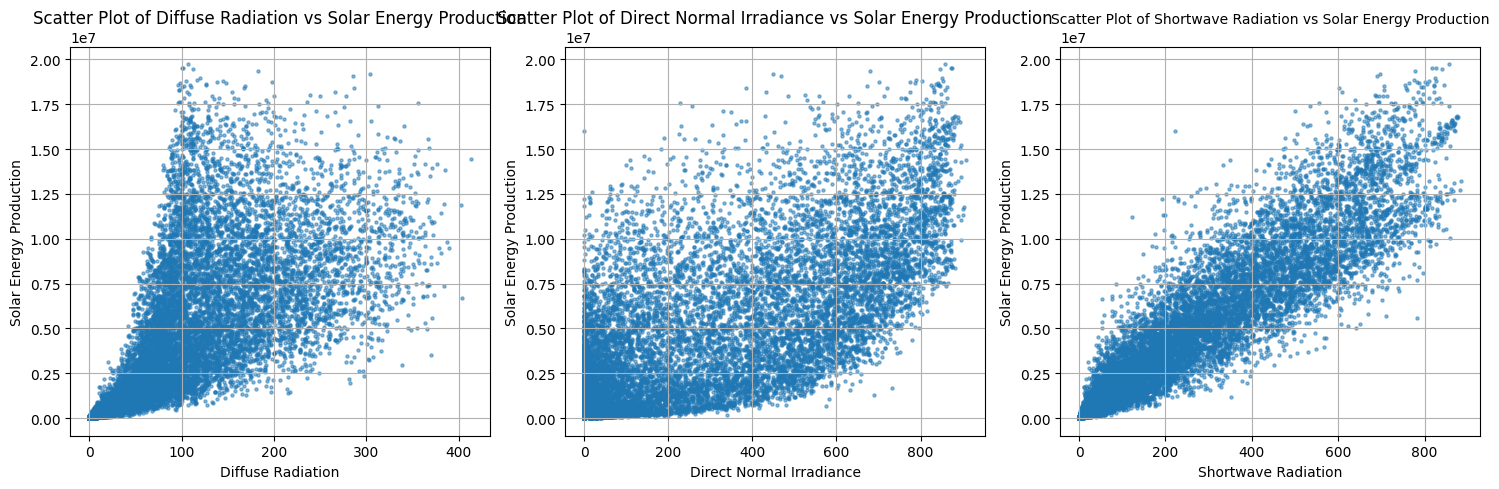

In [10]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'diffuse_radiation'
axs[0].scatter(df_filtered['diffuse_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[0].set_xlabel('Diffuse Radiation')
axs[0].set_ylabel('Solar Energy Production')
axs[0].set_title('Scatter Plot of Diffuse Radiation vs Solar Energy Production')
axs[0].grid(True)

# Scatter plot for 'direct_normal_irradiance'
axs[1].scatter(df_filtered['direct_normal_irradiance'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[1].set_xlabel('Direct Normal Irradiance')
axs[1].set_ylabel('Solar Energy Production')
axs[1].set_title('Scatter Plot of Direct Normal Irradiance vs Solar Energy Production')
axs[1].grid(True)

# Scatter plot for 'shortwave_radiation'
axs[2].scatter(df_filtered['shortwave_radiation'], df_filtered['production_solar'], s=5, alpha=0.5)
axs[2].set_xlabel('Shortwave Radiation')
axs[2].set_ylabel('Solar Energy Production')
axs[2].set_title('Scatter Plot of Shortwave Radiation vs Solar Energy Production', fontsize = 10)
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import plotly.express as px

# Select the desired columns
selected_columns = [
    'Price', 'Load',  'Total_Flow', 'temperature_2m', 'apparent_temperature', 
    'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 
    'shortwave_radiation', 'wind_speed_100m', 'location',     'production_wind', 
    'production_solar', 
    'production_biogas',
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomethane',
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_gasmix',
    'production_CHP_total', 
    'production_solarthermal',
]

# Filter the DataFrame to include only the selected columns
df_selected = df_filtered[selected_columns]

# Select only the numerical columns
df_numeric = df_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(corr_matrix, 
                labels=dict(color="Correlation"), 
                x=corr_matrix.columns, 
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1)

fig.update_layout(title='Correlation Matrix', width=800, height=800)

# Save the figure as an HTML file
fig.write_html("correlation_matrix.html")

# Display a message to the user
print("The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.")

The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.


C:\Users\shba\AppData\Local\Temp\ipykernel_14060\443191409.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors


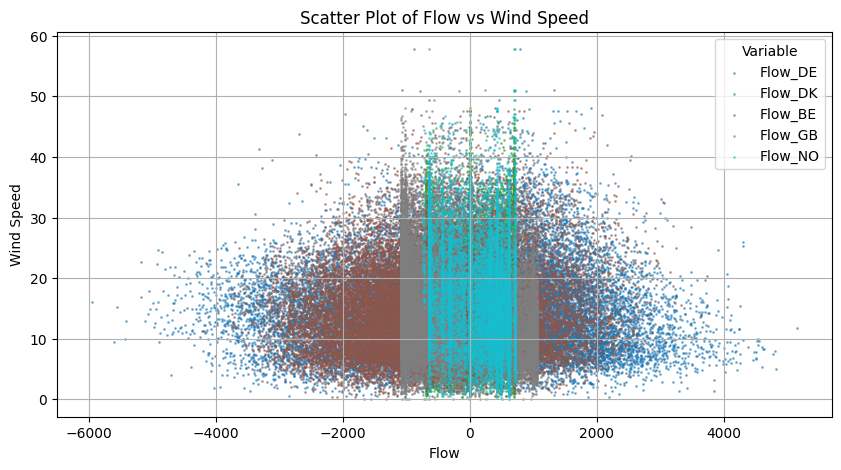

In [11]:
# Define a color map for the variables
colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors

# Plot the scatter plot with different colors for each variable
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Flow_DE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(0), label='Flow_DE')
plt.scatter(df_filtered['Flow_DK'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(1), label='Flow_DK')
plt.scatter(df_filtered['Flow_BE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(2), label='Flow_BE')
plt.scatter(df_filtered['Flow_GB'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(3), label='Flow_GB')
plt.scatter(df_filtered['Flow_NO'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(4), label='Flow_NO')

plt.xlabel('Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Flow vs Wind Speed')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

In [12]:
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
print(nan_totalflow)
nan_temp = df_filtered['temperature_2m'].isna().sum()
print(nan_temp)
nan_cloud = df_filtered['cloud_cover'].isna().sum()
print(nan_cloud)

# Find rows with NaN in 'Total_Flow', 'temperature_2m', or 'cloud_cover'
nan_rows = df_filtered[df_filtered[['Total_Flow', 'temperature_2m', 'cloud_cover']].isna().any(axis=1)]
print("Rows with NaN in any of the specified columns:")
print(nan_rows.index)

2
0
0
Rows with NaN in any of the specified columns:
DatetimeIndex(['2023-10-24 07:00:00+00:00', '2023-10-24 08:00:00+00:00'], dtype='datetime64[ns, UTC]', freq=None)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Drop rows with missing values in the relevant columns
df_filtered_regr = df_filtered[['Price', 'Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']].dropna()

# Check if the DataFrame is empty
if df_filtered_regr.empty:
    print("The DataFrame is empty after dropping rows with missing values.")
else:
    # Define the features (X) and the target (y)
    X = df_filtered_regr[['Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']]
    y = df_filtered_regr['Price']

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions on the same dataset
    y_pred = model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Get the coefficients of the model
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)

        # Sort the coefficients by absolute value
    coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='abs_coefficient', ascending=True)

    # Plot the coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Feature Importance in Predicting Price')
    plt.grid(True)
    plt.show()



KeyError: "['production_allconsuminggas'] not in index"

In [ ]:
df_filtered_regr.head

<bound method NDFrame.head of                             Price      Load  Total_Flow  temperature_2m  \
2022-01-01 00:00:00+00:00  134.00   9907.00      388.25       10.456500   
2022-01-01 01:00:00+00:00   58.80   9782.50     1065.25       10.806500   
2022-01-01 02:00:00+00:00   37.67   9589.75      386.75       10.506500   
2022-01-01 03:00:00+00:00   39.70   9508.00      499.25       10.256500   
2022-01-01 04:00:00+00:00   40.59   9690.75      811.75       10.156500   
...                           ...       ...         ...             ...   
2023-12-31 19:00:00+00:00   13.30  12269.00     -212.00        8.406500   
2023-12-31 20:00:00+00:00   10.68  11774.25     -756.00        8.406500   
2023-12-31 21:00:00+00:00    3.17  11458.00    -1093.25        8.206500   
2023-12-31 22:00:00+00:00    0.10  11273.25    -1154.75        8.356501   
2023-12-31 23:00:00+00:00    0.01  11242.25    -1380.75        8.256500   

                           apparent_temperature  cloud_cover  wind_sp

Mean Squared Error: 4559.241372725218
R^2 Score: 0.6999088893792205
                              Coefficient
Load                            46.112628
Total_Flow                      -8.241778
temperature_2m                 142.098409
apparent_temperature          -149.142623
cloud_cover                     -4.140652
wind_speed_10m                 -10.906037
diffuse_radiation                3.101653
direct_normal_irradiance        12.297706
shortwave_radiation            -43.979067
wind_speed_100m                -21.907211
production_wind              26653.247627
production_solar             56838.280114
production_heatpump              4.602784
production_cofiring          -1280.750228
production_geothermal        -1814.127102
production_other               893.239503
production_waste              2121.086956
production_biooil            -1780.763091
production_biomass            -468.409311
production_wood                 15.720036
production_windoffshore          2.826964
producti

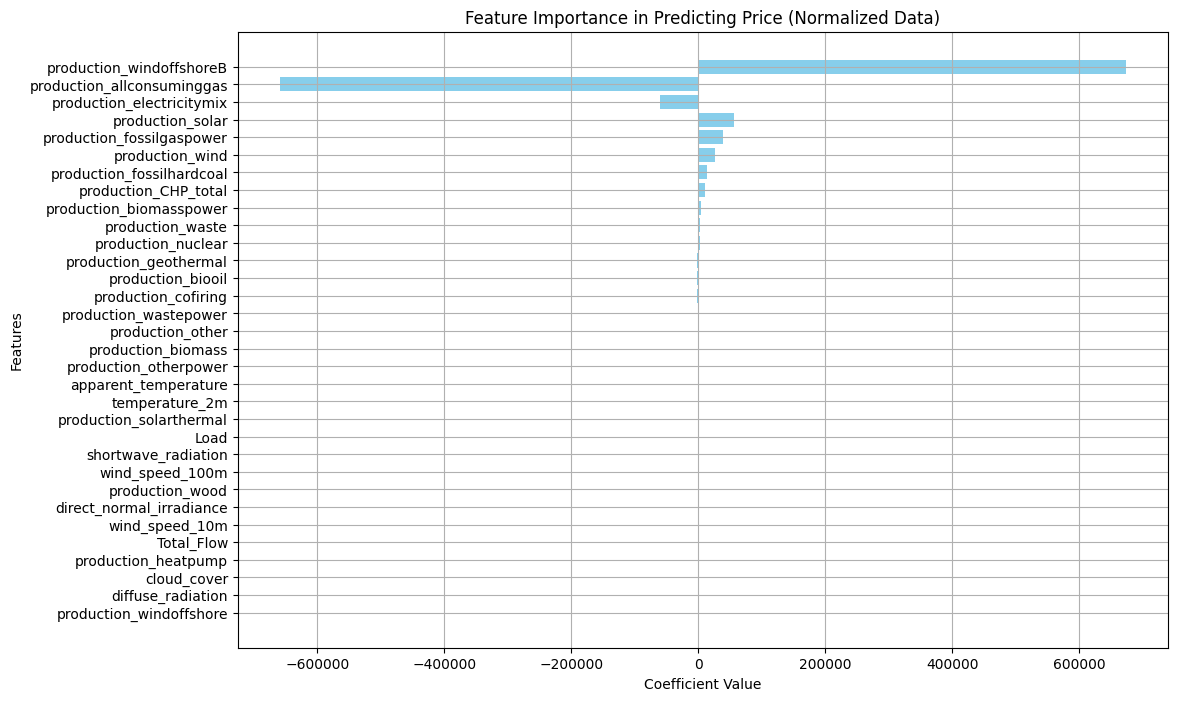

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values in the relevant columns
df_filtered_regr = df_filtered[['Price', 'Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']].dropna()

# Check if the DataFrame is empty
if df_filtered_regr.empty:
    print("The DataFrame is empty after dropping rows with missing values.")
else:
    # Define the features (X) and the target (y)
    X = df_filtered_regr[['Load', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation', 'wind_speed_100m', 'production_wind', 
    'production_solar', 
    'production_heatpump', 
    'production_cofiring', 
    'production_geothermal', 
    'production_other', 
    'production_waste', 
    'production_biooil', 
    'production_biomass', 
    'production_wood', 
    'production_windoffshore', 
    'production_fossilgaspower', 
    'production_fossilhardcoal', 
    'production_nuclear', 
    'production_wastepower', 
    'production_windoffshoreB', 
    'production_biomasspower', 
    'production_otherpower', 
    'production_electricitymix', 
    'production_CHP_total', 
    'production_solarthermal', 
    'production_allconsuminggas']]
    y = df_filtered_regr['Price']

    # Normalize the features
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Train the linear regression model
    model = LinearRegression()
    model.fit(X_normalized, y)

    # Make predictions on the same dataset
    y_pred = model.predict(X_normalized)

    # Evaluate the model
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    # Get the coefficients of the model
    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(coefficients)

    # Sort the coefficients by absolute value
    coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
    coefficients = coefficients.sort_values(by='abs_coefficient', ascending=True)

    # Plot the coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Features')
    plt.title('Feature Importance in Predicting Price (Normalized Data)')
    plt.grid(True)
    plt.show()

C:\Users\shba\AppData\Local\Temp\ipykernel_21636\4254386279.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



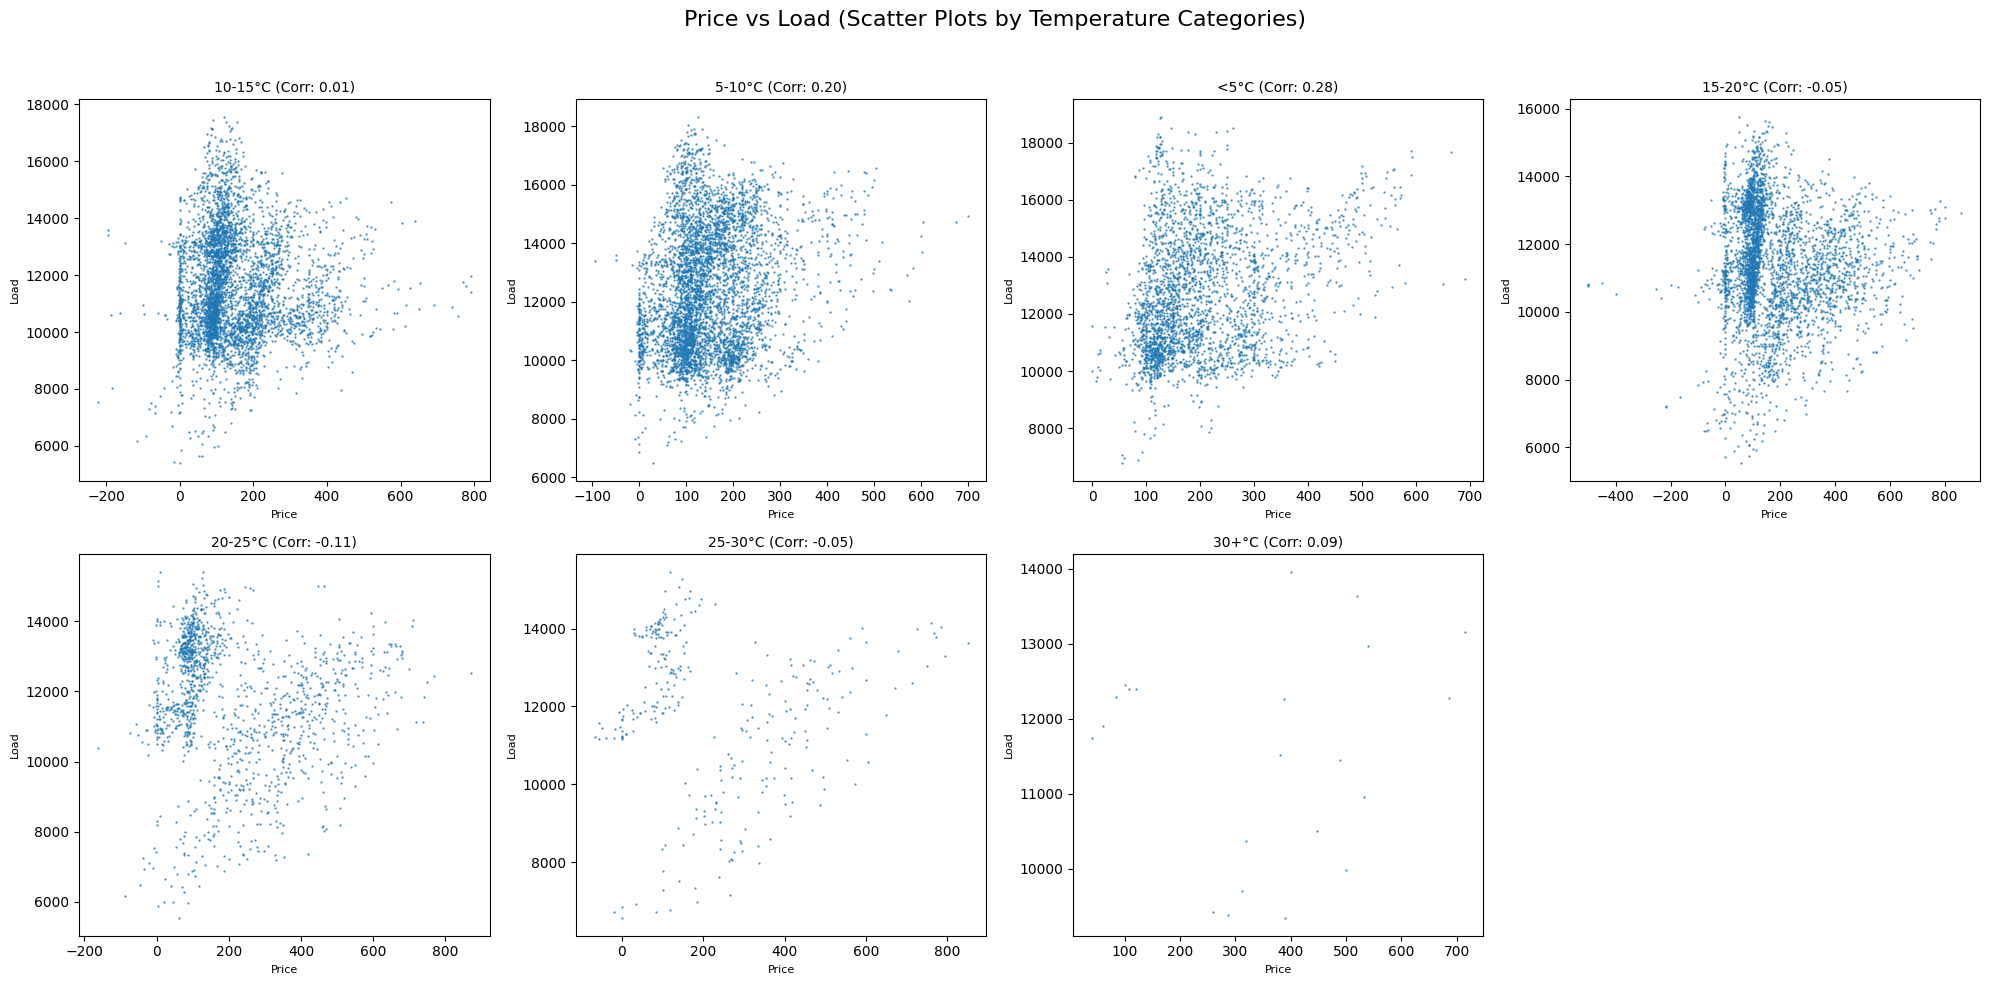

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Controleer op ontbrekende waarden en verwijder deze
df = df_filtered.dropna(subset=['temperature_2m', 'Price', 'Load'])

# Definieer de temperatuurcategorieën
bins = [-float('inf'), 5, 10, 15, 20, 25, 30, float('inf')]
labels = ['<5°C', '5-10°C', '10-15°C', '15-20°C', '20-25°C', '25-30°C', '30+°C']

# Voeg een nieuwe kolom toe voor de temperatuurcategorieën
df['temperature_category'] = pd.cut(df['temperature_2m'], bins=bins, labels=labels)

# Maak een lijst van unieke temperatuurcategorieën
unique_categories = df['temperature_category'].unique()

# Bepaal het aantal categorieën
num_categories = len(unique_categories)

# Maak een figuur met subplots (2 rijen, 4 kolommen, afhankelijk van het aantal categorieën)
rows = (num_categories // 4) + (1 if num_categories % 4 != 0 else 0)
cols = min(4, num_categories)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), sharex=False, sharey=False)
axes = axes.flatten()  # Maak de 2D-array van assen plat voor iteratie

# Itereer over de temperatuurcategorieën en maak scatter plots
for i, category in enumerate(unique_categories):
    # Filter de data voor de huidige temperatuurcategorie
    category_data = df[df['temperature_category'] == category]
    
    # Bereken de correlatie tussen Price en Load
    correlation = category_data['Price'].corr(category_data['Load'])
    
    # Maak een scatter plot voor de huidige categorie
    axes[i].scatter(category_data['Price'], category_data['Load'], s=0.5, alpha=0.7)
    axes[i].set_title(f'{category} (Corr: {correlation:.2f})', fontsize=10)
    axes[i].set_xlabel('Price', fontsize=8)
    axes[i].set_ylabel('Load', fontsize=8)

# Verwijder lege subplots als er minder categorieën zijn dan subplots
for j in range(num_categories, len(axes)):
    fig.delaxes(axes[j])

# Pas de layout aan
fig.suptitle('Price vs Load (Scatter Plots by Temperature Categories)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# test multicollinearity


from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data.sort_values(by='VIF', ascending=False))

C:\Users\shba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Variance Inflation Factor (VIF) for each feature:
                       Feature           VIF
10             production_wind           inf
11            production_solar           inf
27       production_otherpower           inf
28   production_electricitymix           inf
31  production_allconsuminggas           inf
21   production_fossilgaspower           inf
23          production_nuclear           inf
29        production_CHP_total           inf
24       production_wastepower           inf
26     production_biomasspower           inf
22   production_fossilhardcoal           inf
25    production_windoffshoreB  1.714351e+12
13         production_cofiring  1.671564e+06
16            production_waste  3.498183e+05
14       production_geothermal  2.628344e+05
17           production_biooil  1.571714e+05
18          production_biomass  1.202080e+04
15            production_other  5.182136e+02
3         apparent_temperature  2.667038e+02
2               temperature_2m  2.616982e+02
30   

C:\Users\shba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



Removing feature 'production_wind' with VIF: inf
Removing feature 'production_windoffshoreB' with VIF: 1714350828842.98
Removing feature 'production_cofiring' with VIF: 1671480.81
Removing feature 'production_waste' with VIF: 20472.32
Removing feature 'production_otherpower' with VIF: 9517.81
Removing feature 'temperature_2m' with VIF: 1083.32
Removing feature 'production_electricitymix' with VIF: 537.71
Removing feature 'production_biooil' with VIF: 232.38
Removing feature 'production_biomass' with VIF: 165.34
Removing feature 'wind_speed_100m' with VIF: 150.98
Removing feature 'production_solarthermal' with VIF: 103.70
Removing feature 'Load' with VIF: 88.94
Removing feature 'production_wastepower' with VIF: 38.84
Removing feature 'shortwave_radiation' with VIF: 37.25
Removing feature 'production_CHP_total' with VIF: 34.94
Removing feature 'production_windoffshore' with VIF: 25.47
Removing feature 'production_geothermal' with VIF: 19.73
Removing feature 'production_fossilhardcoal' wi

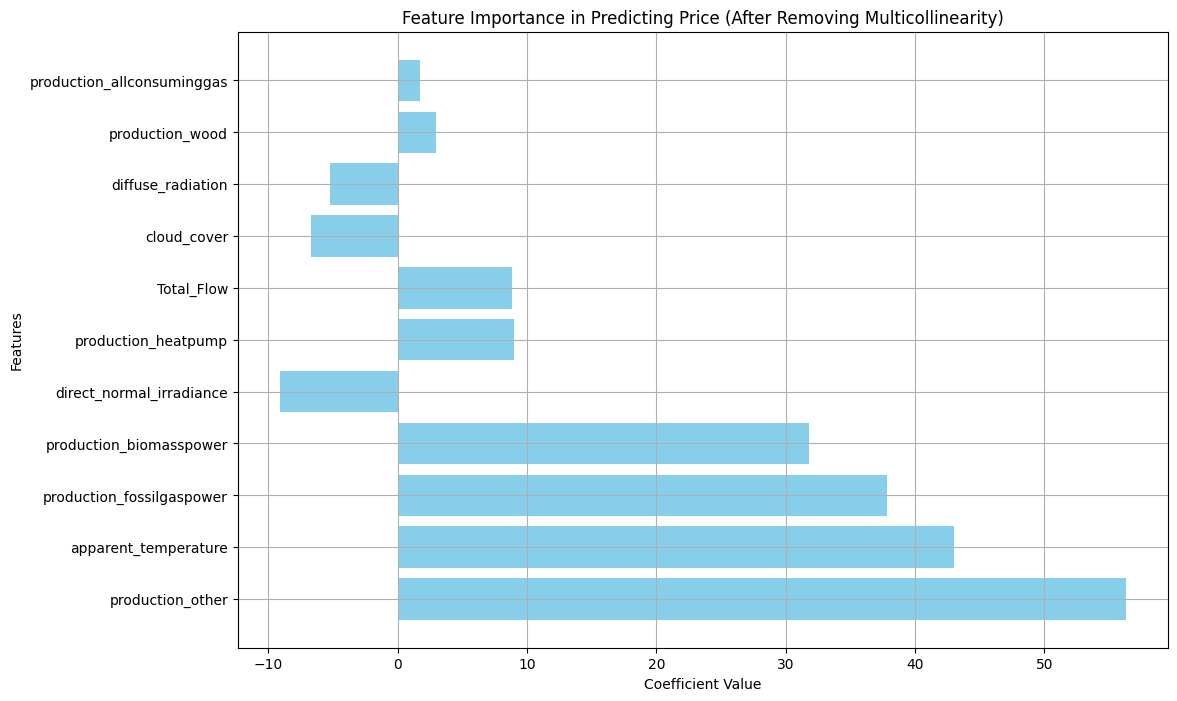

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Iteratively calculate VIF and remove variables with VIF > 5
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

X_filtered = X.copy()  # Start with all features
while True:
    vif_data = calculate_vif(X_filtered)
    max_vif = vif_data['VIF'].max()
    if max_vif > 10:
        # Remove the feature with the highest VIF
        feature_to_remove = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        print(f"Removing feature '{feature_to_remove}' with VIF: {max_vif:.2f}")
        X_filtered = X_filtered.drop(columns=[feature_to_remove])
    else:
        break

print("Final features retained after removing multicollinearity:")
print(X_filtered.columns)

# Step 2: Normalize the filtered features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_filtered)

# Step 3: Train the linear regression model
model = LinearRegression()
model.fit(X_normalized, y)

# Step 4: Make predictions on the same dataset
y_pred = model.predict(X_normalized)

# Step 5: Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Step 6: Get the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X_filtered.columns, columns=['Coefficient'])

# Sort the coefficients by absolute value
coefficients['abs_coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='abs_coefficient', ascending=False)

# Print the top 10 most predictive variables
print("Top 10 most predictive variables for Price:")
print(coefficients.head(10))

# Step 7: Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(coefficients.index, coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Predicting Price (After Removing Multicollinearity)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Selecteer alleen de kolommen die beginnen met 'production'
production_columns = [col for col in df_filtered_regr.columns if col.startswith('production')]

# Voeg een kolom toe voor het jaar (afgeleid van de index)
df_filtered_regr['Year'] = df_filtered_regr.index.year

# Bereken de jaarlijkse som voor alle 'production'-kolommen
yearly_production = df_filtered_regr.groupby('Year')[production_columns].sum()

# Zet de data om naar een lange vorm voor gebruik in Plotly
yearly_production_long = yearly_production.reset_index().melt(id_vars='Year', var_name='Production Variable', value_name='Yearly Sum')

# Maak een interactieve gestapelde staafdiagram met Plotly
fig = px.bar(
    yearly_production_long,
    x='Production Variable',
    y='Yearly Sum',
    color='Year',
    title='Yearly Sum of Production Variables',
    labels={'Yearly Sum': 'Yearly Sum', 'Production Variable': 'Production Variables'},
    barmode='stack',
    height=600,
    color_discrete_sequence=px.colors.qualitative.Plotly  # Correct kleurenpalet
)

# Toon de interactieve grafiek
fig.show()

In [16]:
import numpy as np

correlation = np.corrcoef(df_filtered[direct_normal_irradiance], df_filtered[shortwave_radiation])

NameError: name 'df_filtered' is not defined